# Part I

## Introduction

The current project is interested in estimating key metrics that reflects a country’s socio-economic status. To this end, the **proportion of individual with income level greater than 50-thousand dollars per year (denoted as $p$)** and the **average age (denoted as  $\bar y$)** of the population are chosen as the parameter of interest. The income level of individual which coded as a binary variable (income level greater than 50 thousands dollar per year versus income level less or equal to 50 thousands dollars per year) is chosen to reflect the distribution of wealth within a country. The average age of the population is chosen for it yield insights into the population's age composition. Both metrics provide information on the current demographic and economic composition of the society as well as hints on future trends. 

The dataset used in this project is extracted and prepared by Barry Becker based on a 1994 US census database which is publicly available on the UCI Machine Learning Repository. This dataset is composed of 32,561 entries containing many demographic variables such as respondents' age, race, marital status, income level, etc. 

The current project utilized the available dataset as the population and obtained estimates of the parameters of interest (average age of individuals and proportion of individuals with income greater than 50K per year) by taking samples from the dataset using simple random sampling and stratified sampling techniques. Throughout the analysis, we will compare the performance of the two sampling techniques and discuss the advantages and disadvantages of both.

## Preliminary Data Analysis

The population means of our two response variables are listed below, and we will be using this to check the accuracy of our two sampling methods later. The code can be found in the appendix.

|     | Value  |   
| :----------: | :----------: | 
| Age Population Mean ($\bar y_{pop}$)|38.5816
| Income Population Proportion ($p$)|0.2408


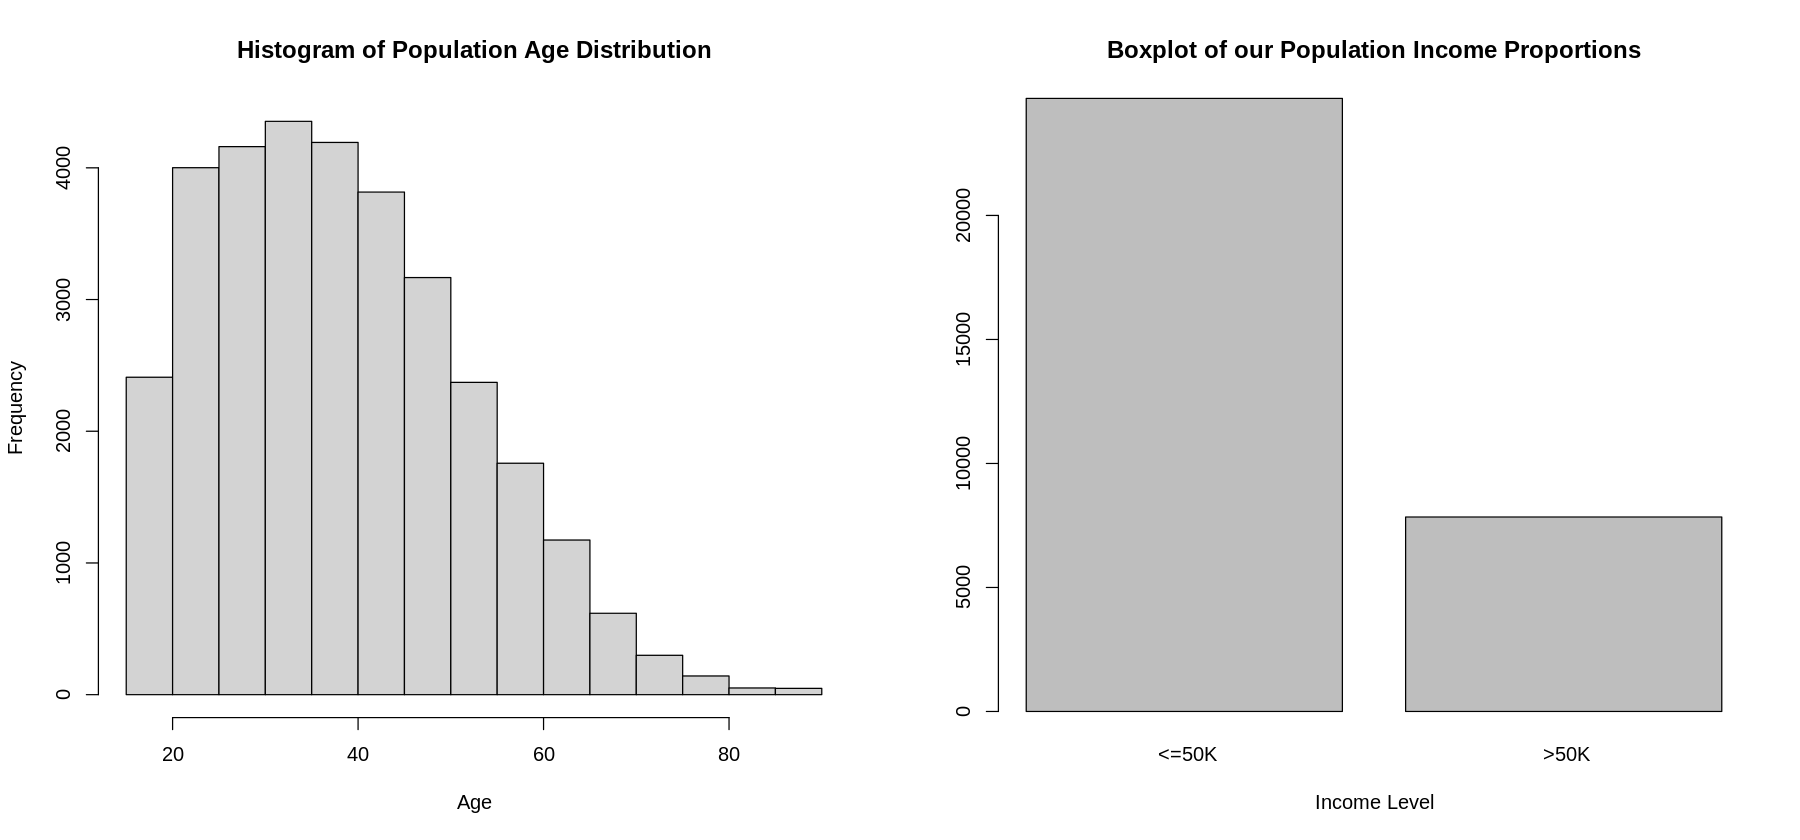

In [3]:
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
hist(adult$age, 
     main = "Histogram of Population Age Distribution", 
     xlab = "Age")
barplot(table(adult$income), 
        main = "Boxplot of our Population Income Proportions",
        xlab = "Income Level")

The histogram for continuous variable age is right-skewed with the majority of the population ages being between 20 years old and 50 years old with a mean of around 30 years old. We take note that there are few samples with ages on the higher end. From the barplot, it looks like more than three quarters of the population are making less than 50K a year, with approximately one quarter of the population making more than 50K a year.

## Analysis and Comparison

### Sample Size Determination

Once we load the data into R, we can see that our population size is ${N}$ = 32561. From here, we can decide on a sample size. 

We calculate our sample size by using the following formulas: 
- $n_0 = \frac{1.96^2 s^2_{guess}}{\delta^2}$, where $s^2_{guess}$ is the guessed variance, and $\delta$ is a desired margin of error.
- $n = \frac{n_0}{1 + \frac{n_0}{N}}$, where N is the population/census size. This formula is used to take the finite population correct factor into consideration.

For our continuous response, age, we do not have a most conservative guess of the variance therefore we decide to base our sample size on the calculation for our binary response variable. For our binary data, we assume $\hat{p}$ = 0.5, which provides us with a most conservative guess of the variance and standard error is maximized, being 0.25 or 0.5 respectively.

A desired level of margin of error was chosen to be 0.02 (2%); as we think it is good enough accuracy for our goals of this project. The resulting $n = 2236$ is also a nice and realistic number to use for a dataset analysis like this. Because we cannot find an estimated sample size for the continuous analysis, we believe that the same sample size can be used for our continous sample analysis as well.

### Simple Random Sampling

A simple random sample is the simplest method to sample from a population. Treating our dataset as our population, each member of the population must have an equal chance of being sampled. This is a very simple sampling strategy that hopes to maximize the randomness of our data, which minimizes lurking factors that we are not analyzing.

The sampling method maximizes the randomness of the data we obtain, meaning we have very little control as to how the data will be distributed. Intuitively, this may suggest that the sample we collect will be representative of the population. However, there is a remote chance that the sample we collect may not be fully representative of our dataset. At this point, we will have to assume that our sample will be fully representative, and that our members in our sample all had an equal chance of being selected to be in our sample.

In order to randomly generate an independent and identical sample, we use sample.int() function to draw 2236 indices from 32561 total indices. 

#### Binary Population
Recall that our response variable is the proportion of people that have an income greater that 50K. Sampling from our population, we obtain the sampled mean, 0.2415, with a standard error of $SE_{\hat{p}} = \sqrt{(1 - \frac{n}{N})\frac{\hat{p}(1 - \hat{p})}{n}} = $ 0.0087. The 95% confidence interval is $\hat{p} \pm 1.96 \times SE_{\hat{p}}$, which is [0.2244, 0.2586].
Through our simple random sample as well as utilizing the Central Limit Theorem, our high sample size yields a normal sampling distribution with a mean of 0.2405. From this, we are 95% confident that the true proportion of people with an income greater than 50K is between 0.2224 and 0.2596. 

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|0.2415
| Sample SE|0.0087
| Lower CI|0.2244
| Upper CI|0.2586

#### Continous Population
We use the sample mean $\bar{y_s} = \frac{\sum_{i = 1}^{n}{y_i}}{n}$ to estimate the population mean age for continuous parameter. Using the sample standard deviation, we are able to calculate the standard error using $SE_{\bar{y_s}} = \sqrt{(1-\frac{n}{N}) \frac{{s_s}^2}{n}}$. The 95% confidence interval is measured by ${\bar{y_s}}~ \pm 1.96 \times SE_{\bar{y_s}}$

|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|38.6556
| Sample SE|0.2847
| Lower CI|38.0975
| Upper CI|39.2137

According to the output, the sample mean is 38.6556 with a standard error of 0.2847. As the sample size is large enough, we can utilize the central limit theorem and conclude that the sampling distribution of the mean will be normal. From this, we can be 95% confident that the true population mean is between 38.0975 and 39.2137.

### Stratified Sampling

For stratified sampling method, we first use information about the population to divide the population of interest into sub-populations. Then we random sample $n_h$ number of individuals from each subpopulation where $n_h$ is obtained through proportional allocation. In theory, stratified sampling will more accurately reflect the population studied based on a set of chosen characteristics.

* Assumptions: 

> We assume the sampling cost for each subpopulation is the same. 

> We assume the subpopulations have similar variance. 

* Procedures:

> First, $n_h$ for each subpopulation is calculated based on subpopulation size such that $n_h = n\frac{N_h}{N}$, where $n$ is the total sample size, $N_h$ is the subpopulation size, and $N$ is the population size. 

> Second, we divide the population into $h$ subpopulation and randomly sample $n_h$ individuals without replacement from each subpopulation to form of stratified sample. 

> Finally, we find the mean and variance of age and proportion of individuals with income greater than 50K for each subpopulation and combine the estimates to form one stratified estimates $\bar y_{str,s}$,$p_{str,s}$ of the population parameters. 

#### Binary Population
For the binary population, we divide the population into 4 strata according to individual's race. The four strata are `Asian-Pac-Islander`, `Black`, `Other`, and `White`. 

> The stratified estimate for the binary variable is computed as $\hat p_{str} = \sum_{h = 1}^H \frac{N_h}{N}\hat p_h$ where $\hat p_h$ is the sample proportion of individuals in the $h-th$ stratum with income greater than 50K. 

> The stratified estimate SE of sample proportion is computed as $SE[\hat p_{str}] = \sqrt{\hat Var[p_{str}]}$, where $\hat Var[p_{str}]= \sum_{h = 1}^H (\frac{N_h}{N})^2 (1 - \frac{n_h}{N_h}) \frac{\hat p_{h}(1- \hat p_h)}{n_h}$. 

> The 95% confidence interval is computed as $\hat p_{str} \pm 1.96 \times SE[\hat p_{str}]$

|     | Value  |   
| :----------: | :----------: | 
| Sample Proportion|0.24064
| Sample SE|0.00867
| Lower CI|0.22364
| Upper CI|0.25764

Looking at the above result, the stratified estimate of sample proportion is 0.24064 with a sample SE of 0.00867. We conclude from the above result, with 95% confidence that the true population proportion is between 0.22364 and 0.25764.

#### Continuous Population
For the continuous response, `age`, we divided the population into 5 strata according to individuals marital status, the strata are `Divorced`, `Married`, `Never Married`, `Separated`, `Widowed`. 
> The estimate for the mean age is $\bar{y}_{str} = \sum_{h=1}^{H} ((\frac{N_{h}}{N})\bar{y}_{h}) $, when $N_{h}$ is the size of the $h^{th}$ strata, $N$ is the population size, and $\bar{y}_{h}$ is the mean age of $h^{th}$ strata. 

> The standard error for this estimate is $SE_{\bar{y}_{str}} =  \sqrt{\sum_{h=1}^{H}((\frac{N_{h}}{N})^2SE_{\bar{y}_h}}$, where $SE_{\bar{y}_h} = \sqrt{(1-\frac{n_h}{N_h})\times\frac{S^2_{h}}{n_h}}$ with $S_{h}$ being the standard deviation of the $h^{th}$ strata. 

> The 95% confidence interval for $\bar{y}_{str}$ is $\bar{y}_{s}\pm 1.96 \times SE_{\bar{y}_{str}}$

|     | Value  |   
| :----------: | :----------: | 
| Sample Mean|38.6169
| Sample SE|0.2285
| Lower CI|38.1690
| Upper CI|39.0648

From our result, the estimate for mean age is 38.6169. The standard error for this estimate is 0.2285, Since our sample size sufficiently large (n = 2236), by the central limit theorem, the distribution of our sample mean will follow a normally distributed closely. We conclude that we are 95% confident that the true mean age is between 38.1690 and 39.0648. 

## Discussion

Overall, the 95% confidence intervals computed using simple random sampling (SRS) and stratified sampling method captured the true population parameters of interest. Looking closely, the stratified sampling method yields narrower confidence intervals for both the continuous (mean age) and binary parameter (proportion of individuals with income greater than 50K) compared to simple random sampling. This is expected because only within stratum variation contributes to the variance for stratified estimator whereas the variance for simple random estimator has contribution from both between-stratum and within-stratum variation. The reduction in the standard error of estimates is most clear for the continuous population as the SE of the estimate for mean age reduced to 0.2285 years from 0.2847 years. This is because the stratification was based on individuals’ marital status and where the between stratum variation was large. Therefore we see a meaningful reduction in SE associated with the estimate of mean age compared to the SRS estimate. However, the reduction in SE associated with the sample proportion is not as obvious, the SE of the estimated proportion reduced to 0.00867 (SE of the stratified estimate) from 0.00870 (SE of the SRS estimate). This relatively trivial reduction in SE is mainly due to the choice of variable used to divide stratum. For the binary response, we used individuals’ race to divide the population into strata. This stratification didn’t result in strata that are as heterogeneous as the ones we have for the continuous response. As a result, the SE of the stratified estimate for the binary response didn’t improve much compared to the SRS estimate. 

While the numeric results and accuracy favour stratified sampling, we must take note of the practicality of both techniques. Intuitively, for most cases, a simple random sample seems to be a much easier, quicker, and cheaper option to collect data versus a stratified sample, where planning and costs may become a big factor in determining properties like sample size. 
For stratified sampling, further preparations need to be made before a sample can be taken; such as how strata will be split, the population sizes of each stratum, the within variances of each stratum, and many more. Compared to the simple random sample, preparations are a lot easier, with less information needed such as full population size and estimated variance needed. With all the information needed for a stratified sample, the costs and time required grows immensely; which is why a simple random sample is more favoured when it comes to practicality.
When sampling with a stratified method, the challenge will arise when selecting stratas. Different ways of splitting may provide a better or worse estimate. But it may provide more accurate coverage for the population as there is more information that can be controlled. 

## Conclusion

In conclusion, we have conducted two separate sampling techniques to achieve population parameters for two response variables. Both sample techniques and analysis has reached the same conclusion, with results being accurate to the true population parameter within an acceptable degree. While conducting this analysis, we also noted the performance of these sampling techniques, and we conclude that from a statistical standpoint, stratified sampling and analysis beats simple random sampling and its analysis.

Numerically, our results will be taken from our stratified sampling and analysis.

Our final estimated mean population age is $\bar{y_s} = 38.6169$, with its standard error being $SE(\bar{y}) = 0.2285$, and our final 95% confidence interval being $[38.1690, 39.0648]$. 

Our final estimated proportion of people with incomes over 50K is $\hat{p} = 0.24064$, with its standard error being $SE(\hat{p}) = 0.00867$, and our final 95% confidence interval being $[0.22364, 0.25764]$. 

In a real analysis, we wouldn't know the true population parameter values; but in this case, we can see that both $\bar{y_{pop}} = 38.5816$ and $p = 0.2408$ are both encompassed by the confidence intervals built above as well.

# Part II

The article by Perlman and Wu concerns the emergence and proliferation of the “New Tests” in the field of statistics. The term “New Tests” is used by the authors to describe many of the newly emerged statistical tests with promising properties but often reach conclusions that go against scientific intuition. The proponents of the “New Tests” hold the notion that having a test with the best statistical properties is of paramount importance compared to scientific intuition. The authors of the article refute such a statement and hold a different view on the role of intuition in statistics. As the authors put, scientific intuition is extremely important in scientific studies in general therefore tests that reach conclusions against scientific intuition are scientifically inappropriate tests. This article reinstated the importance of having good intuition in guiding scientific inquiry in general while reminding us to remain skeptical of statistically sounding yet un-intuitive tests. 

## Appendix

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



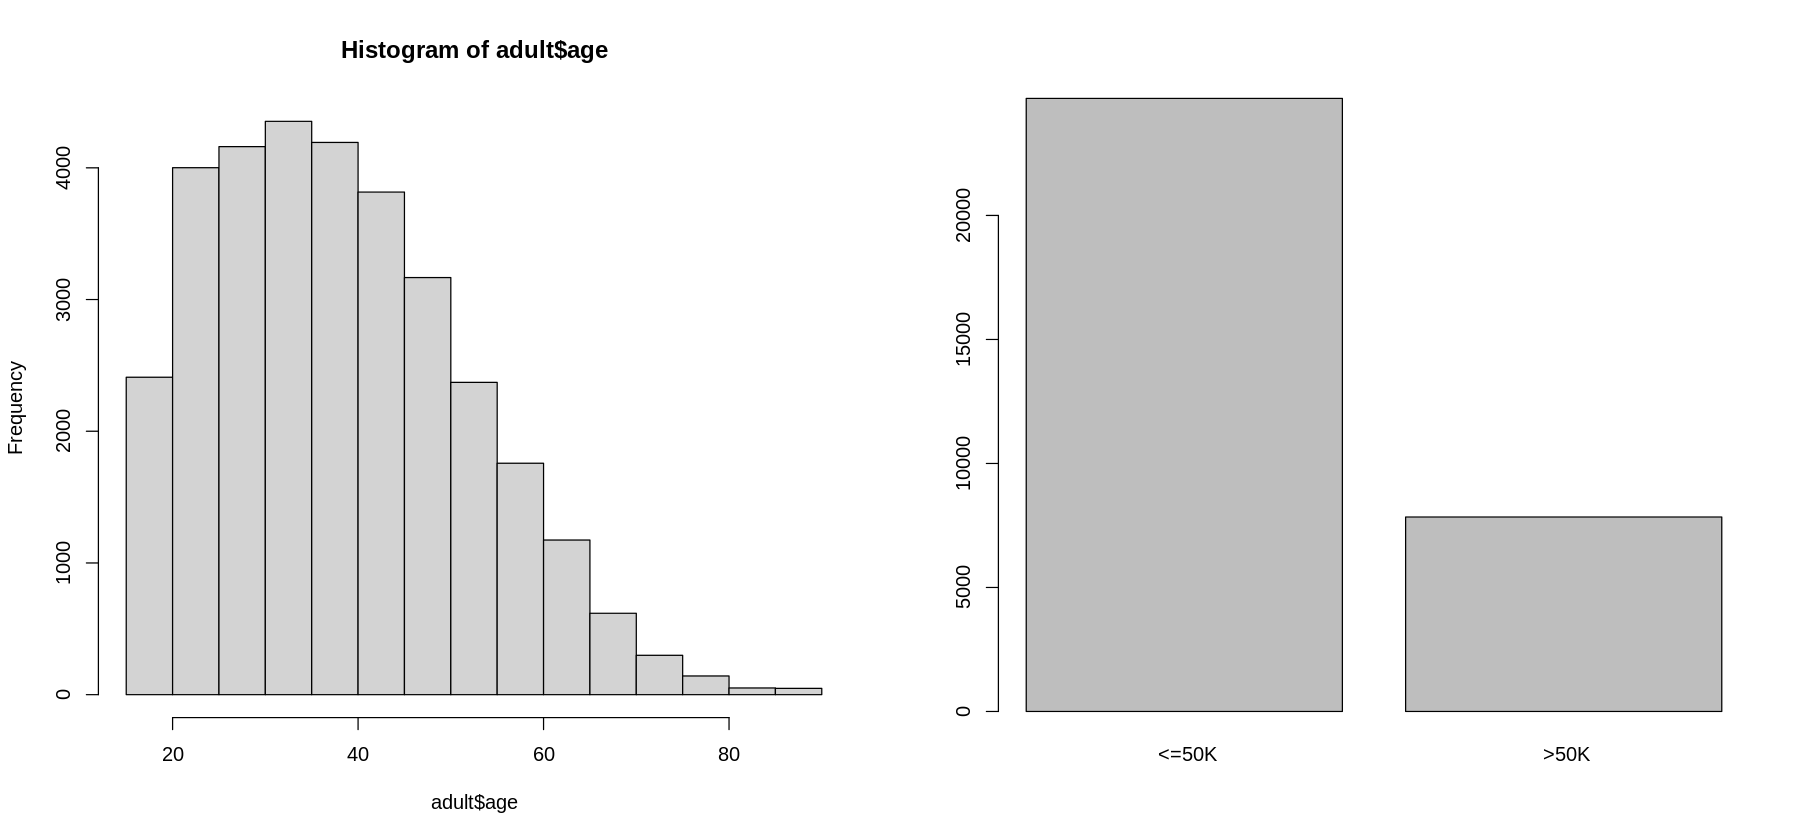

In [1]:
library(tidyverse)
library(GGally)
adult <- read.csv("adult.data", header = FALSE)
column_names <- c("age",
                  "workclass",
                  "final_weight",
                  "education", 
                  "education_num",
                  "marital_status",
                  "occupation",
                  "relationship",
                  "race",
                  "sex",
                  "capital_gain", 
                  "capital_loss", 
                  "hours_per_week", 
                  "native_country",
                  "income")
adult <- setNames(adult, column_names)
adult <- adult %>% mutate_if(is.character, as.factor)
adult <- adult %>%
    mutate(income = as.factor(income))

n = 2236 
N = nrow(adult) ## population size

#data visualization
options(repr.plot.width = 15, repr.plot.height = 7)
par(mfrow=c(1,2))
hist(adult$age)
barplot(table(adult$income))

## Simple random sample

### Continous Population

In [17]:
set.seed(344)

SRS.index <- sample.int(N, n, replace = FALSE) 
adultsample <- adult[SRS.index, ]

ybar <- mean(adultsample$age)
s_sd <- sd(adultsample$age)
se_ybar <- sqrt((1-n/N)*(s_sd^2/n))
round(ybar,4)
#s_sd
round(se_ybar,4)

round(c(ybar - 1.96 * se_ybar, ybar + 1.96 * se_ybar),4)

[1] 38.6556

[1] 0.2847

[1] 38.0975 39.2137

### Binary Population

In [18]:
set.seed(344)

SRS.index <- sample.int(N, n, replace = FALSE) 
adultsample <- adult[SRS.index, ]

income <- adultsample %>%
    group_by(income) %>%
    summarize(n = n())

p_hat <- income[2,2]/n
p_hat = pull(p_hat)
round(p_hat, 4)

phat_se = sqrt((1-n/N)*p_hat*(1-p_hat)/n)
round(phat_se, 4)

round(c(p_hat - 1.96 * phat_se, p_hat + 1.96 * phat_se),4)

[1] 0.2415

[1] 0.0087

[1] 0.2244 0.2586

## Stratified Sampling

### Continuous Parameter Estimation

In [2]:
level <- as.character(levels(as.factor(adult$marital_status)))
status <- as.character(adult$marital_status)
for (i in 1:length(status)) {
    ifelse (status[i] == level[2] | status[i] == level[3] | status[i] == level[4], 
            status[i] <- " Married", 
            status[i] <- status[i])
}

In [3]:
## Get pproportional stratum sizes
adult$status <- as.factor(status)

str_continuous <- adult %>%
    group_by(status) %>%
    summarise(N_h = n(), stratum_prop = N_h/N) %>%
    mutate(n_h = round(stratum_prop*n))
str_continuous

status,N_h,stratum_prop,n_h
<fct>,<int>,<dbl>,<dbl>
Divorced,4443,0.13645158,305
Married,15417,0.47348054,1059
Never-married,10683,0.32809189,734
Separated,1025,0.03147938,70
Widowed,993,0.03049661,68


since nn for Married-AF-spouse, Married-civ-spouse and Married-spouse-absent are too small, so we combine them into Married status.



In [4]:
## Stratified Samples
marital_levels <- levels(adult$status)
nh <- str_continuous$n_h

Divorced_sample <- adult %>%
    filter(status == marital_levels[1]) %>%
    pull(age) %>%
    sample(nh[1])

Married_sample <- adult %>%
    filter(status == marital_levels[2]) %>%
    pull(age) %>%
    sample(nh[2])

NeverMarried_sample <- adult %>%
    filter(status == marital_levels[3]) %>%
    pull(age) %>%
    sample(nh[3])

Separated_sample <- adult %>%
    filter(status == marital_levels[4]) %>%
    pull(age) %>%
    sample(nh[4])

Widowed_sample <- adult %>%
    filter(status == marital_levels[5]) %>%
    pull(age) %>%
    sample(nh[5])

In [6]:
## Estmitate mean age
stratum_prop <- str_continuous$stratum_prop
Divorced_est <- (stratum_prop[1])*mean(Divorced_sample)
Married_est <- (stratum_prop[2])*mean(Married_sample)
NeverMarried_est <- (stratum_prop[3])*mean(NeverMarried_sample)
Separated_est <- (stratum_prop[4])*mean(Separated_sample)
Widowed_est <- (stratum_prop[5])*mean(Widowed_sample)

hat_ybar_str <- sum(c(Divorced_est,Married_est,NeverMarried_est,Separated_est,Widowed_est))

## estimate SE
Divorced_var <- var(Divorced_sample)

Married_var <- var(Married_sample)

NeverMarried_var <- var(NeverMarried_sample)

Separated_var <- var(Separated_sample)

Widowed_var <- var(Widowed_sample)

vars <- c(Divorced_var,Married_var,NeverMarried_var,Separated_var,Widowed_var)

N_h <- str_continuous$N_h
Divorced_var <- ((stratum_prop[1])^2) * (1-(nh[1]/N_h[1]))*(vars[1]/nh[1])
Married_var <- ((stratum_prop[2])^2) * (1-(nh[2]/N_h[2]))*(vars[2]/nh[2])
NeverMarried_var <- ((stratum_prop[3])^2) * (1-(nh[3]/N_h[3]))*(vars[3]/nh[3])
Separated_var <- ((stratum_prop[4])^2) * (1-(nh[4]/N_h[4]))*(vars[4]/nh[4])
Widowed_var <- ((stratum_prop[5])^2) * (1-(nh[5]/N_h[5]))*(vars[5]/nh[5])

yhatse <- sqrt(sum(c(Divorced_var,Married_var,NeverMarried_var,Separated_var,Widowed_var)))

result_data <- data.frame(Estimate = hat_ybar_str, SE = yhatse, true_parameter = mean(adult$age))
result_data

Estimate,SE,true_parameter
<dbl>,<dbl>,<dbl>
38.61688,0.2285194,38.58165


In [8]:
phat.str.me <-1.96*yhatse
phat.str.confint <-c(hat_ybar_str-phat.str.me,hat_ybar_str+phat.str.me)
str.matrix <-matrix(c("SampleMean.","SE","LowerBound95%CI",
"Upper Bound95%CI",
round(hat_ybar_str,3), round(yhatse,3),
round(phat.str.confint[1],3),
round(phat.str.confint[2],3)), nrow=4)
knitr::kable(x =str.matrix,col.names=c("","Value"))



|                 |Value  |
|:----------------|:------|
|SampleMean.      |38.617 |
|SE               |0.229  |
|LowerBound95%CI  |38.169 |
|Upper Bound95%CI |39.065 |

### Binary Parameter Estimation

In [39]:
level <- as.character(levels(as.factor(adult$race)))
races <- as.character(adult$race)
for (i in 1:length(races)) {
    if (races[i] == level[1] | races[i] == level[4]) {
        races[i] <- " Other"
        }
}
adult$race <- as.factor(races)

level <- as.character(levels(as.factor(adult$race)))
level

[1] " Asian-Pac-Islander" " Black"              " Other"             
[4] " White"

In [40]:
stratum_n <-adult %>% 
    group_by(race) %>% 
    summarise(stratum_size = n()) %>%
    pull(stratum_size)
stratum_n

[1]  1039  3124   582 27816

In [45]:
income_n_by_stratum <- adult %>% 
    group_by(income, race) %>% 
    summarise(num_greater_than_50K = n(),
              .groups = "drop")
stratum_size <- c(rep(stratum_n,2)) 
income_n_by_stratum$stratum_size <- stratum_size
income_stratify_data <- income_n_by_stratum %>% 
            mutate(p = num_greater_than_50K/stratum_size,
                   allocation_prop = stratum_size/N,
                   n_h = round(n*allocation_prop)) %>%
            slice(5:8)
income_stratify_data

income,race,num_greater_than_50K,stratum_size,p,allocation_prop,n_h
<fct>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>
>50K,Asian-Pac-Islander,276,1039,0.2656400,0.03190934,71
>50K,Black,387,3124,0.1238796,0.09594300,215
>50K,Other,61,582,0.1048110,0.01787414,40
>50K,White,7117,27816,0.2558599,0.85427352,1910


In [46]:
binary_stratify_data <- adult %>% select(race, income)
level <- levels(as.factor(binary_stratify_data$race))
Asian <- binary_stratify_data %>% filter(race == level[1]) %>% pull(income)
Black <- binary_stratify_data %>% filter(race == level[2]) %>% pull(income)
Other <- binary_stratify_data %>% filter(race == level[3]) %>% pull(income)
White <- binary_stratify_data %>% filter(race == level[4]) %>% pull(income)

In [49]:
set.seed(123456)
n_h <- income_stratify_data$n_h
asian_sample <- sample(as.character(Asian), n_h[1])
black_sample <- sample(as.character(Black), n_h[2])
other_sample <- sample(as.character(Other), n_h[3])
white_sample <- sample(as.character(White), n_h[4])


In [50]:
asian_prop <- mean(asian_sample == " >50K")
black_prop <- mean(black_sample == " >50K")
other_prop <- mean(other_sample == " >50K")
white_prop <- mean(white_sample == " >50K")
props <- c(asian_prop, black_prop, other_prop, white_prop)
subpopulation_prop <- income_stratify_data$allocation_prop
prop_est <- sum(props*subpopulation_prop)
prop_est

[1] 0.2406401

In [52]:
N_h <- income_stratify_data$stratum_size
FPC = 1 - n_h/N_h
asian_var = FPC[1]*asian_prop*(1-asian_prop)/n_h[1]
black_var = FPC[2]*black_prop*(1-black_prop)/n_h[2]
other_var = FPC[3]*other_prop*(1-other_prop)/n_h[3]
white_var = FPC[4]*white_prop*(1-white_prop)/n_h[4]
prop_var = c(asian_var, black_var, other_var, white_var)
pooled_se = sqrt(sum(prop_var*(subpopulation_prop)^2))
pooled_se

[1] 0.008671406

In [53]:
data.frame(name = c("Proportion Estimate", "Proportion SE", "Lower Bound", "Upper Bound"),
           value = c(prop_est,round(pooled_se,5),prop_est - 1.96*pooled_se,prop_est + 1.96*pooled_se))

name,value
<chr>,<dbl>
Proportion Estimate,0.2406401
Proportion SE,0.0086700
Lower Bound,0.2236442
Upper Bound,0.2576361
